In [ ]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# read the csv
data = pd.read_csv("/content/drive/MyDrive/IRIS.csv")

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# checking for missing values
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
# checking imbalanced data
data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [ ]:
len(data)

150

# Convert categorical data into numerical and split the train and test

In [ ]:
# converting categorical data into numerical
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data['species'] = encoder.fit_transform(data['species'])

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

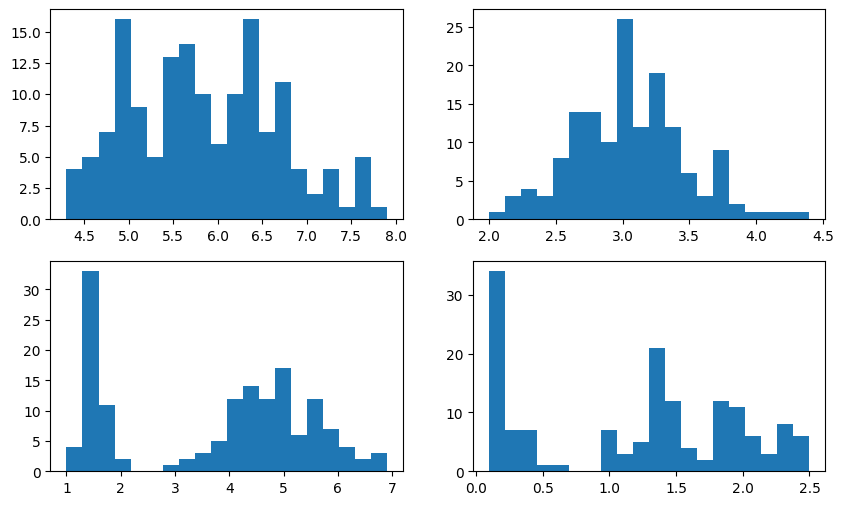

In [ ]:
# graphs

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(figsize=(10,6), nrows= 2, ncols=2)

ax0.hist(data["sepal_length"], bins=20)
ax1.hist(data["sepal_width"], bins=20)
ax2.hist(data["petal_length"], bins=20)
ax3.hist(data["petal_width"], bins=20);

In [ ]:
def handle_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and handle outliers
    series = np.where(series < lower_bound, lower_bound, series)
    series = np.where(series > upper_bound, upper_bound, series)

    return series

In [ ]:
columns_to_check = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


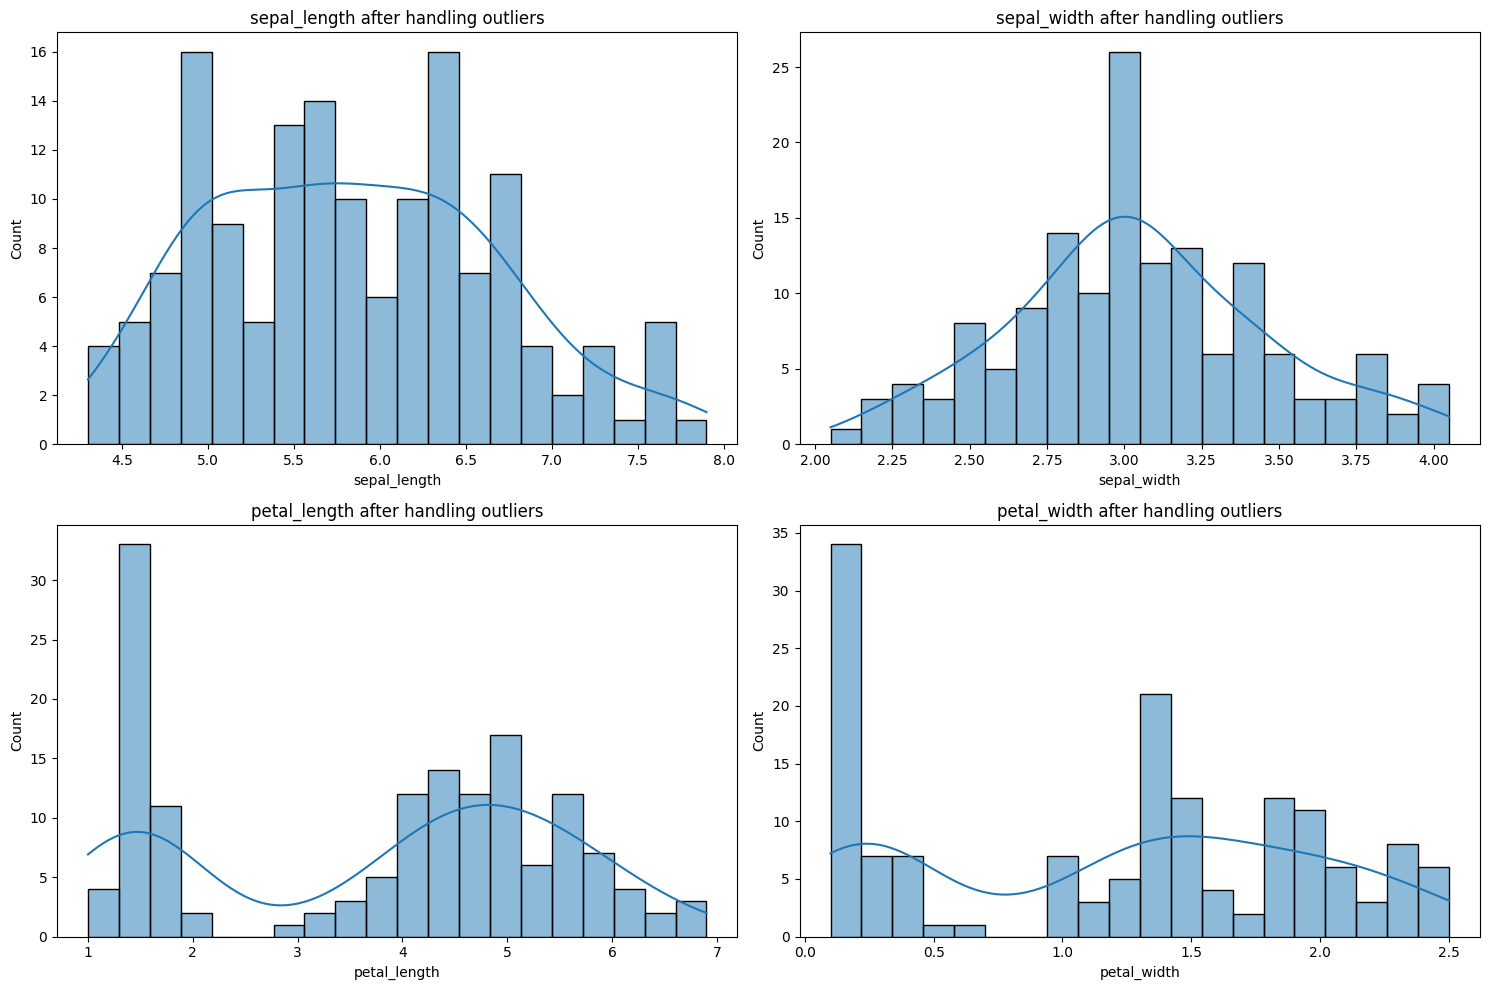

In [ ]:
import seaborn as sns

fig, axs = plt.subplots(figsize=(15, 10), nrows=2, ncols=2)

# Check and handle outliers for each column
for ax, column in zip(axs.flatten(), columns_to_check):
  # Detect and handle outliers
  data[column] = handle_outliers_iqr(data[column])

  # Plot the histogram after handling outliers
  sns.histplot(data[column], bins=20, kde=True, ax=ax)
  ax.set_title(f'{column} after handling outliers')

plt.tight_layout()
plt.show()

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
len(data)

150

In [ ]:
# Splitting the data
from sklearn.model_selection import train_test_split
np.random.seed(42)

X = data.drop('species', axis=1)
y = data['species']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [ ]:
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.60,1.0,0.2
15,5.7,4.05,1.5,0.4
65,6.7,3.10,4.4,1.4
11,4.8,3.40,1.6,0.2
42,4.4,3.20,1.3,0.2


# Normalizing the data before training

In [ ]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

scaled_x_train = scale.fit_transform(x_train)
scaled_x_test = scale.transform(x_test)

# building the model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

models = {
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "NaiveBayes": GaussianNB()
}

In [ ]:
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    function to fit and score on different models
    """

    np.random.seed(42)
    model_score = {}
    predictions = {}

    for name, model in models.items():
        model.fit(x_train, y_train)

        model_score[name] = model.score(x_test, y_test)
        predictions[name] = model.predict(x_test);

    return model_score, predictions

In [ ]:
models_score, predictions = fit_and_score(models, scaled_x_train, scaled_x_test, y_train, y_test)

models_score

{'KNN': 1.0, 'SVC': 1.0, 'NaiveBayes': 1.0}

In [ ]:
predictions

{'KNN': array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 0]),
 'SVC': array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 0]),
 'NaiveBayes': array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 0])}

<Axes: >

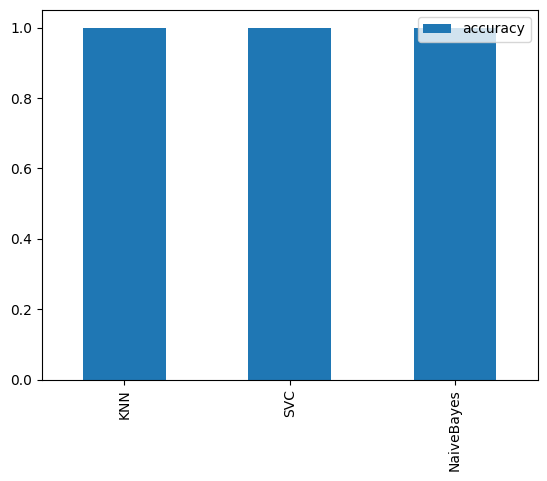

In [ ]:
# compare the models
compare_df = pd.DataFrame(models_score, index=[ "accuracy"])

compare_df.T.plot.bar()

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(true_labels, predictions, labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']):
    """
    Plot confusion matrix given true labels and predictions.
    """
    cm = confusion_matrix(true_labels, predictions)

    if labels is None:
        labels = np.unique(true_labels)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

Confusion Matrix for KNN:


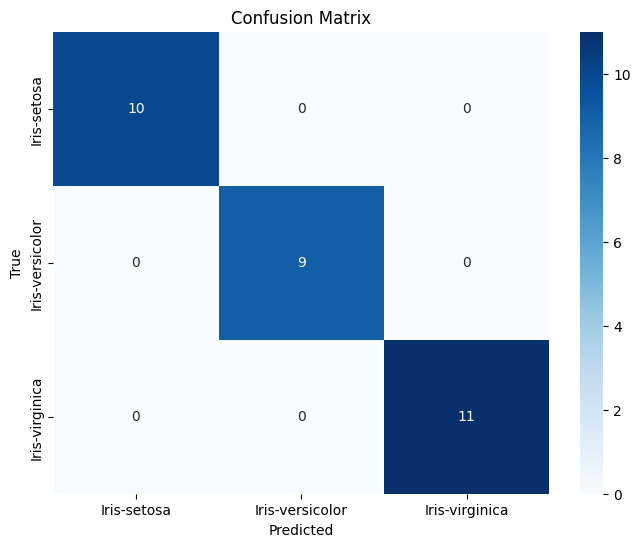

Confusion Matrix for SVC:


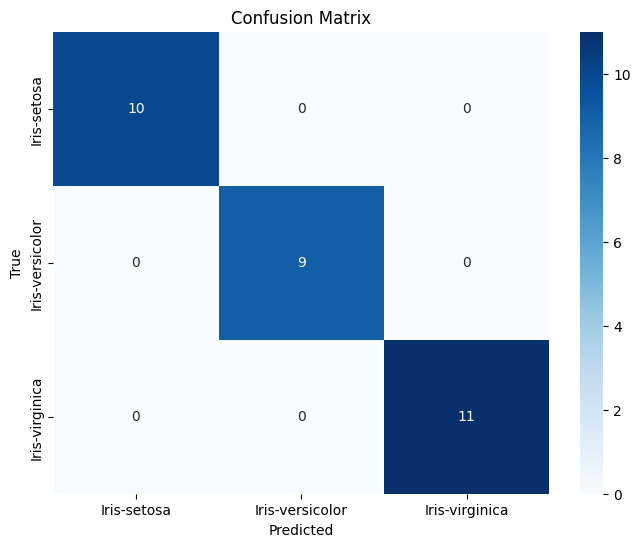

Confusion Matrix for NaiveBayes:


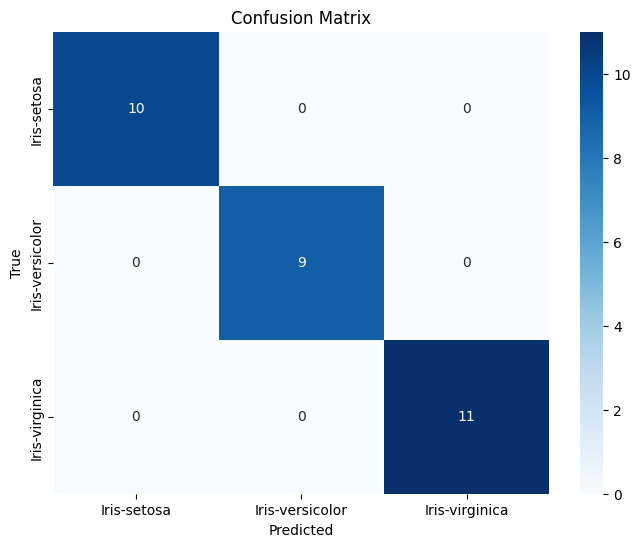

In [ ]:
for model_name, predictions in predictions.items():
    print(f"Confusion Matrix for {model_name}:")
    plot_confusion_matrix(y_test, predictions)

# Task 2: Replace some values with NaN

In [ ]:
x_train.iloc[:, 0] = np.where(np.random.rand(len(x_train)) < 0.1, np.nan, x_train.iloc[:, 0])

In [ ]:
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.60,1.0,0.2
15,5.7,4.05,1.5,0.4
65,6.7,3.10,4.4,1.4
11,4.8,3.40,1.6,0.2
42,4.4,3.20,1.3,0.2


In [ ]:
x_train.isna().sum()

sepal_length    14
sepal_width      0
petal_length     0
petal_width      0
dtype: int64

In [ ]:
x_train[pd.isnull(x_train['sepal_length'])]


,sepal_length,sepal_width,petal_length,petal_width
146,NaN,2.5,5.0,1.9
142,NaN,2.7,5.1,1.9
16,NaN,3.9,1.3,0.4
137,NaN,3.1,5.5,1.8
75,NaN,3.0,4.4,1.4
105,NaN,3.0,6.6,2.1
122,NaN,2.8,6.7,2.0
25,NaN,3.0,1.6,0.2
95,NaN,3.0,4.2,1.2
93,NaN,2.3,3.3,1.0


In [ ]:
x_train.iloc[:, 1] = np.where(np.random.rand(len(x_train)) < 0.1, np.nan, x_train.iloc[:, 1])
x_train.iloc[:, 2] = np.where(np.random.rand(len(x_train)) < 0.1, np.nan, x_train.iloc[:, 2])
x_train.iloc[:, 3] = np.where(np.random.rand(len(x_train)) < 0.1, np.nan, x_train.iloc[:, 3])


In [ ]:
x_train[pd.isnull(x_train)]

,sepal_length,sepal_width,petal_length,petal_width
22,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN
65,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN
42,NaN,NaN,NaN,NaN
...,...,...,...,...
71,NaN,NaN,NaN,NaN
106,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN


In [ ]:
x_train.isna().sum()

sepal_length    14
sepal_width      7
petal_length    18
petal_width     10
dtype: int64

# Task 3:	Replace the NaN values you obtained in step 2 with mean of the corresponding column. Display the result of replacement

In [ ]:
x_train.fillna(x_train.mean(), inplace=True)

In [ ]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.600000,1.0,0.200000
15,5.7,4.050000,1.5,0.400000
65,6.7,3.100000,4.4,1.400000
11,4.8,3.400000,1.6,0.200000
42,4.4,3.200000,1.3,0.200000
...,...,...,...,...
71,6.1,2.800000,4.0,1.300000
106,4.9,2.500000,4.5,1.700000
14,5.8,4.000000,1.2,0.200000
92,5.8,3.051327,4.0,1.166364


In [ ]:
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.60,1.0,0.2
15,5.7,4.05,1.5,0.4
65,6.7,3.10,4.4,1.4
11,4.8,3.40,1.6,0.2
42,4.4,3.20,1.3,0.2


In [ ]:
x_train.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

# Task 4: Classification on the dataset you obtained in Step 3 with SVM, Naïve Bayes and KNN. Display confusion matrix.

In [ ]:
# scaling the new data

scale = StandardScaler()

scaled_x_train = scale.fit_transform(x_train)
scaled_x_test = scale.transform(x_test)

In [ ]:
scaled_x_train

array([[-1.57006847e+00,  1.31558437e+00, -1.76251719e+00,
        -1.33704954e+00],
       [-1.05508601e-01,  2.39457575e+00, -1.44953538e+00,
        -1.06033185e+00],
       [ 1.22590946e+00,  1.16705065e-01,  3.65759139e-01,
         3.23256567e-01],
       [-1.30378486e+00,  8.36032649e-01, -1.38693902e+00,
        -1.33704954e+00],
       [-1.83635208e+00,  3.56480927e-01, -1.57472811e+00,
        -1.33704954e+00],
       [ 0.00000000e+00,  1.06481873e-15,  7.41337316e-01,
         1.01505078e+00],
       [ 8.26484044e-01,  3.56480927e-01,  4.28355502e-01,
         4.61615409e-01],
       [-7.71217634e-01,  1.07580851e+00, -1.44953538e+00,
        -1.33704954e+00],
       [-1.03750125e+00,  1.31558437e+00, -1.51213174e+00,
        -1.33704954e+00],
       [-7.71217634e-01,  2.39457575e+00,  2.77983693e-16,
        -1.47540838e+00],
       [ 0.00000000e+00, -8.42398380e-01,  8.03933678e-01,
         1.01505078e+00],
       [ 2.93916818e-01,  8.36032649e-01,  4.28355502e-01,
      

In [ ]:
# fitting the model and gets the predictions
models_score, predictions = fit_and_score(models, scaled_x_train, scaled_x_test, y_train, y_test)

models_score

{'KNN': 1.0, 'SVC': 1.0, 'NaiveBayes': 0.9666666666666667}

Confusion Matrix for KNN:


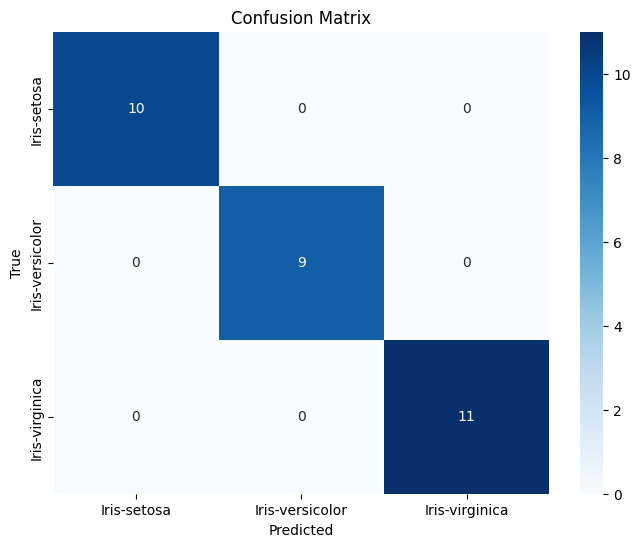

Confusion Matrix for SVC:


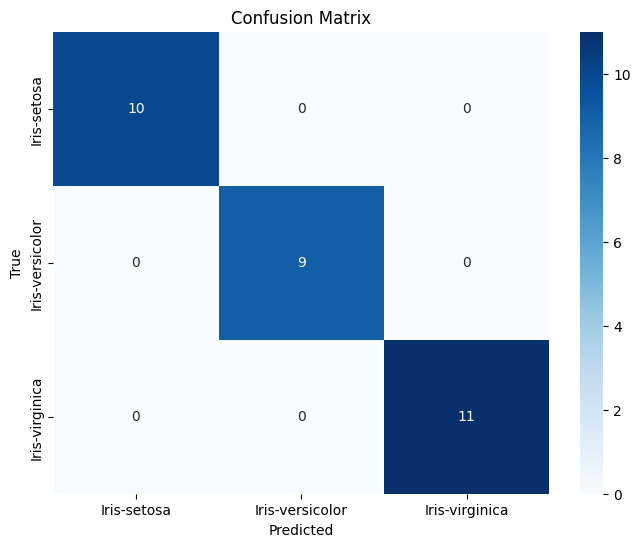

Confusion Matrix for NaiveBayes:


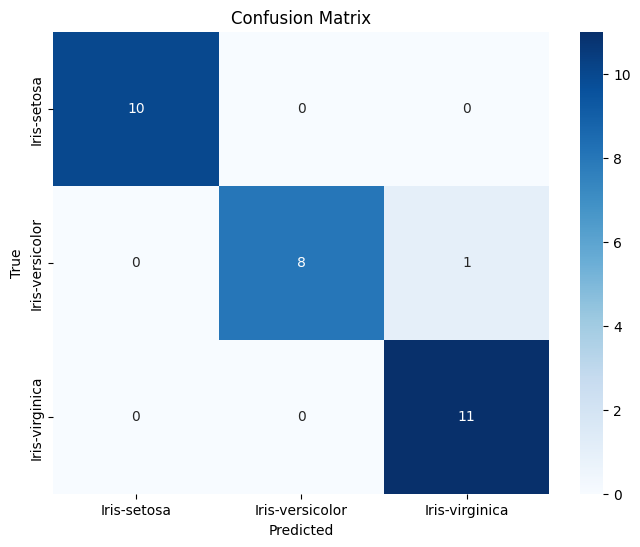

In [ ]:
for model_name, predictions in predictions.items():
    print(f"Confusion Matrix for {model_name}:")
    plot_confusion_matrix(y_test, predictions)